# Homework 2

Notes to students:  

1. Going forward, all homework assignments will be produced as notebooks independent of those presented in class.  You may feel free to use the notebooks presented in class to assist you with the homework.  
2. If you have already run a "CAPM" model for some other stock than AAPL and submitted it with Homework 1, please copy and paste your code and results for this homework assignment.  If you did not submit a CAPM for Homework 1, you will not be penalized.  Your "CAPM" model will be grade for this homework assignment.  If you are struggling because, for example, the New York Stock Exchange has a potentially discontinuous price series, please try using Yahoo, which also trades on the NASDAQ.  The goal is not to turn you into finance professionals, but to quickly get you engaged in statistical learning (using a well-understood model) and hypothesis testing.  
3. The question has been raised as to whether students of my class and Dr. Sobolevsky's class may work together on their Foundations Project.  Subject to the other constraints in the syllabus, we approve this request.

Please answer the questions below, disregarding any homework assignments in existing notebooks.

1. We discussed at some length the bivariate linear regression model, $y_i=\beta_0+\beta_1 x_i+\epsilon_i$.  Using R or Python,  generate two series of 1,000 random integers with values between 0 and 9.  Call one series $y$ and the other $x$.  Using R or Python, fit the bivariate linear regression model.  Examine the t-statistic on the coefficient that captures the relationship between $y$ and $x$ to evaluate whether it is greater than two in absolute value.  Would you reject or fail to reject that there is no relationship between these two series?

2. Download the file train.dta from the course website.  These data are formatted as a Stata dataset.  Read this dataset into R or Python.  (For R, you may find the “foreign” library of use.  For Python, we have already installed the Pandas library.  The goal here is to get you familiar with reading datasets with alternative formatting standards.)  Generate summary statistics for the two variables in the data:  (1) $d$, which is an indicator for whether a particular email is spam; and, (2) $x1$, which is an attribute of the email.  Using least squares, regress $d$ on $x1$.  Is the constant statistically significantly different than zero at a 95% level confidence?  Is the coefficient associated with $x1$ statistically significantly different that zero at a 95% level confidence?  Suppose you determine a threshold as to whether an email is spam if the predicted value of $d$ exceeds 1.  In turn, I give you a new email with an attribute value of 0.65 but do not provide a label for the email as to whether it is, in truth, spam.  Given the attribute value of 0.65, would you classify the incoming email as spam or not spam?  Suppose instead I give you another new email with an attribute value of 1.01, but again do not provide a label for the email.  Would you classify it as spam or not spam?

3. Using an API such as Quandl, download a daily price series for a particular publicly-traded stock of your choice for a five-year time period (don’t use Apple), as well as the daily price series on the exchange on which it trades.  Using R or Python, calculate the log returns of each series as the natural log of the ratio of (price today/price yesterday).  Use adjusted closing prices as they reflect so-called stock splits.  Using R or Python, generate a histogram of log returns of the stock of your choice.  Using R or Python, generate a scatterplot that relates the log returns of your stock of choice to the log returns of the exchange on which it is traded.  Finally, using R or Python, fit a linear model to obtain estimates of what finance folks call the "alpha" and the "beta".  Is "alpha" significantly different than zero at a 95% level of confidence?  Does a 95% confidence level for "beta" include one?  (Note that your results will depend on the stock price you use.)    

4. This is a very challenging set of questions, but they address several key topics in data analytics.  You may work with other students on a solution with the recognition that you may not complete this set of questions.  I have frequently used the phrase "data generating process" (or "DGP") to describe the hypothetical process by which observations of data arise in the real world.  We discussed at some length the bivariate linear regression model, $y_i=\beta_0+\beta_1 x_i+\epsilon_i$.  In this problem, we will work with a specific DGP and evaluate features of $\widehat \beta_1$, the least squares estimate of $\beta_1$.  Suppose your DGP is $y_i=1+2x_i+ϵ_i$, where $x \sim N(0,1)$ and $\epsilon \sim N(0,1)$.  Using R or Python, write code to generate 1,000 draws for $x$ and $\epsilon$.  Use these draws to generate $y$ in accordance with the given DGP.  Using R or Python, write code to estimate the bivariate model, $y_i=\beta_0+\beta_1 x_i$ and to summarize the findings.  

5. Repeat 4 above five different times for a new set of random draws for each replication.  (This effort is called Monte Carlo simulation.  Each time you generate a new set of data and estimate a model, you have a replication.  For example, here you have five replications.)   

6. Write code to automatically repeat 5 above 1,000 times (or 1,000 replications), each time automatically recording the estimated value of $\beta_1$.  Generate a histogram of these 1,000 replications of your estimates of $\beta_1$.  What does the dispersion of these replications measure?  

7. Suppose that you were not interested in the estimate of $\beta_1$, but instead in some functional transformation, such as the estimate of $\exp(\beta_1)$.  What might you do with your 1,000 replications from 6 above to inform you about the distribution of this transformation of $\beta_1$?

The following URL may prove useful - https://wiki.python.org/moin/ForLoop

Submit code and results.

#Question 1

In [25]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.io.data as web
import Quandl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

Populating the interactive namespace from numpy and matplotlib


In [14]:
x = np.random.random_integers(0,9,1000)
y = np.random.random_integers(0,9,1000)
x = pd.DataFrame(x)
y = pd.DataFrame(y)
data = pd.merge(x, y, left_index=True, right_index=True)
mod = smf.ols(formula='y ~ x', data = data).fit()
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.09362
Date:                Fri, 25 Sep 2015   Prob (F-statistic):              0.760
Time:                        14:32:44   Log-Likelihood:                -2486.9
No. Observations:                1000   AIC:                             4978.
Df Residuals:                     998   BIC:                             4988.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.4978      0.171     26.252      0.0

# Question 2

In [17]:
df = pd.read_stata('train.dta')
mod = smf.ols(formula='d ~ x1', data = df).fit()
print(mod.summary())
print 0.65 * 1.0155
print 1.01 * 1.0155

                            OLS Regression Results                            
Dep. Variable:                      d   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     495.0
Date:                Fri, 25 Sep 2015   Prob (F-statistic):           2.21e-89
Time:                        15:15:46   Log-Likelihood:                -523.32
No. Observations:                1000   AIC:                             1051.
Df Residuals:                     998   BIC:                             1060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0180      0.026     -0.698      0.4

# Significance Analysis
For the constant, it is NOT statistically significantly different than zero at a 95% level confidence, because the absolute T-value is less than 1.96.  
For the coefficient associated with $x1$ , it IS statistically significantly different than zero at a 95% level confidence, because the absolute T-value is much greater than 1.96.  
  
  Regression Model
# d = 1.0155 * x1

$\therefore $   
for the first example with the attribute value of 0.65, d = 1.0155 * 0.65 = 0.660075 < 1, so it is categorized to be NOT spam.  
for the first example with the attribute value of 0.65, d = 1.0155 * 1.01 = 1.025655 > 1, so it is categorized to be spam.

# Question 3  for FaceBook

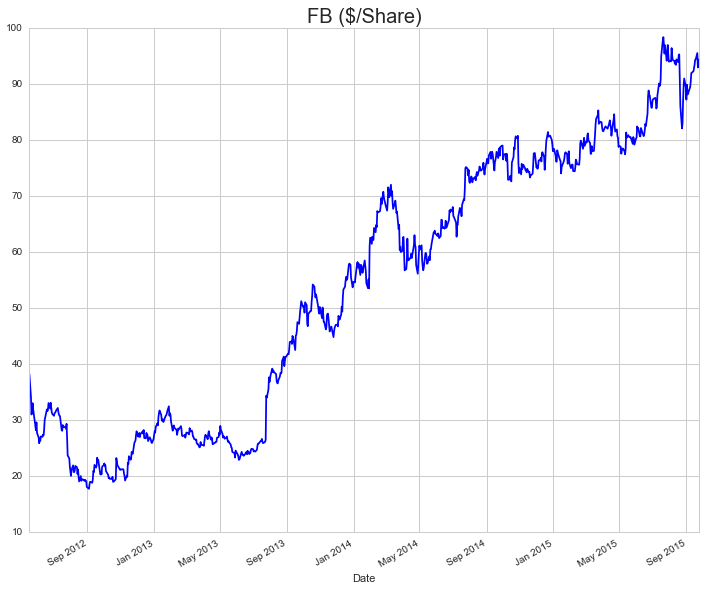

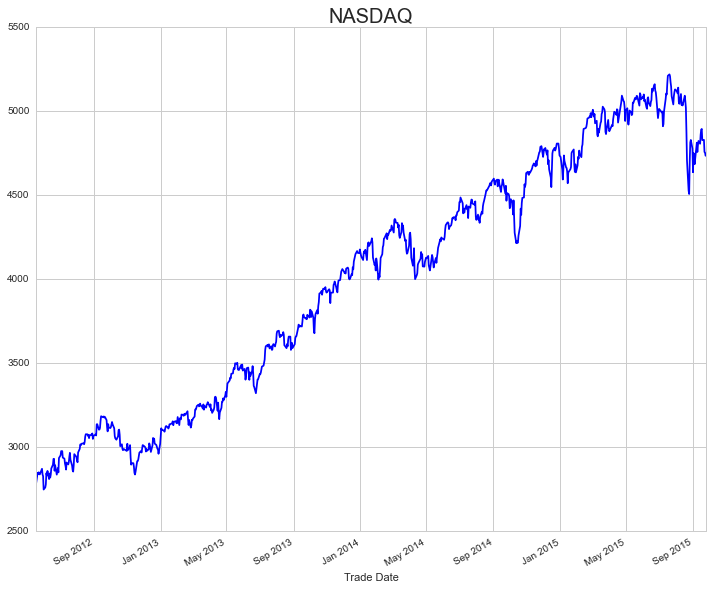

In [39]:
fb_all = Quandl.get("YAHOO/FB", trim_start="2012-5-18")
nasdaq_all = Quandl.get("NASDAQOMX/COMP", trim_start="2012-5-18")
fb = fb_all['Adjusted Close']
nasdaq = nasdaq_all['Index Value']

plt.figure(figsize = (12,10))
#plt.plot(fb)
fb.plot(color='blue')
plt.title('FB ($/Share)', fontsize=20)

plt.figure(figsize = (12,10))
#plt.plot(nasdaq)
nasdaq.plot(color='blue')
plt.title('NASDAQ', fontsize=20)

0.00107366567031 0.0271306775303
0.000632845984522 0.00914583149317


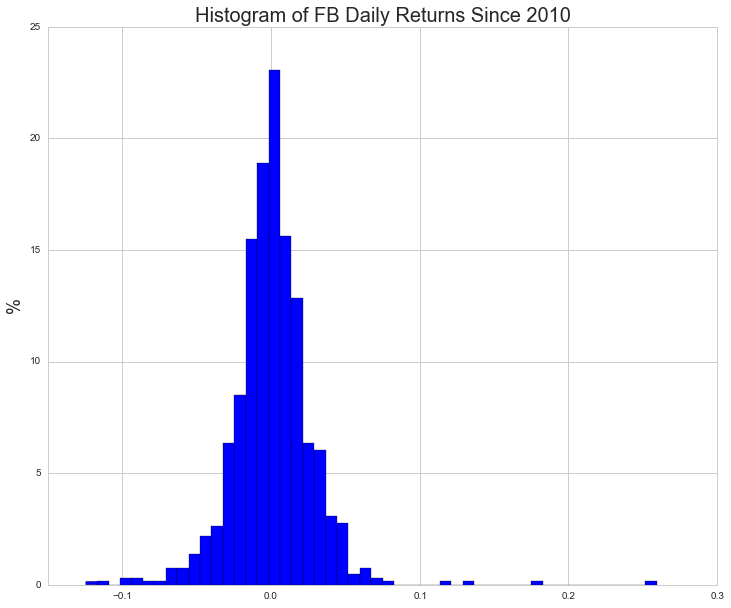

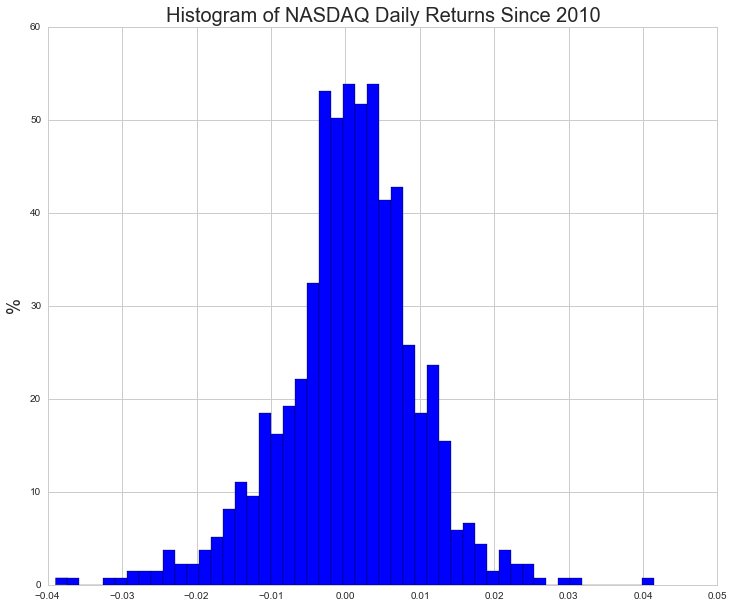

In [40]:
# Calculate log returns, which is the standard finance measure for daily returns in finance.
fb_returns = np.log(fb / fb.shift(1))
nasdaq_returns = np.log(nasdaq / nasdaq.shift(1))
fb_returns = fb_returns.dropna()
nasdaq_returns = nasdaq_returns.dropna()

print fb_returns.mean(), fb_returns.std()

plt.figure(figsize= (12,10))
plt.hist(fb_returns, bins=50, normed=True, color='blue')
plt.title('Histogram of FB Daily Returns Since 2010', fontsize=20)
plt.ylabel('%', fontsize=18)

print nasdaq_returns.mean(), nasdaq_returns.std()

plt.figure(figsize= (12,10))
plt.hist(nasdaq_returns, bins=50, normed=True, color='blue')
plt.title('Histogram of NASDAQ Daily Returns Since 2010', fontsize=20)
plt.ylabel('%', fontsize=18)

nasdaq    0.000633
fb        0.001074
dtype: float64
nasdaq    0.009146
fb        0.027131
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     fb   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     140.7
Date:                Fri, 25 Sep 2015   Prob (F-statistic):           4.05e-30
Time:                        17:01:15   Log-Likelihood:                 1908.1
No. Observations:                 842   AIC:                            -3812.
Df Residuals:                     840   BIC:                            -3803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------

(-0.1, 0.1)

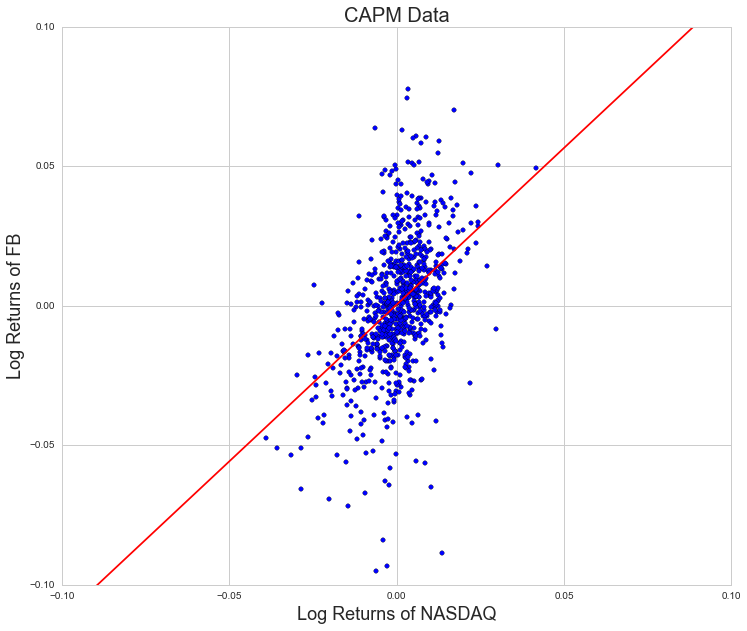

In [73]:
# Create dataframes for merge and regression.
fb_returns = pd.DataFrame(fb_returns)
nasdaq_returns = pd.DataFrame(nasdaq_returns)


# Merge and rename.
data = pd.merge(nasdaq_returns, fb_returns, left_index=True, right_index=True)
data.rename(columns={'Index Value':'nasdaq', 'Adjusted Close':'fb'}, inplace=True)

# Confirm summary stats
print data.mean()
print data.std()

# Use StatsModels Formula, which emulates R formula style.
# Run CAPM and review results.
mod = smf.ols(formula='fb ~ nasdaq', data = data).fit()
print (mod.summary())

# This a convoluted
figure, ax = plt.subplots(figsize=(12,10))

mod = smf.ols(formula='fb ~ nasdaq', data = data).fit()
abline_plot(model_results=mod, ax=ax, color='red')
ax.scatter(nasdaq_returns, fb_returns)
ax.set_title('CAPM Data', fontsize = 20)
ax.set_ylabel('Log Returns of FB', fontsize = 18)
ax.set_xlabel('Log Returns of NASDAQ', fontsize = 18)
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.1, 0.1])

"alpha" is NOT significantly different than zero at a 95% level of confidence  
95% confidence level for "beta" include one  


Otherwise, the conjecture can be expressed as a joint hypothesis:

$H_0: \alpha = 0, \beta=1$

$H_1: \text{ not }H_0$

# Question 4

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4221.
Date:                Fri, 25 Sep 2015   Prob (F-statistic):               0.00
Time:                        16:52:42   Log-Likelihood:                -1387.2
No. Observations:                1000   AIC:                             2778.
Df Residuals:                     998   BIC:                             2788.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9759      0.031     31.823      0.0

(-4, 4)

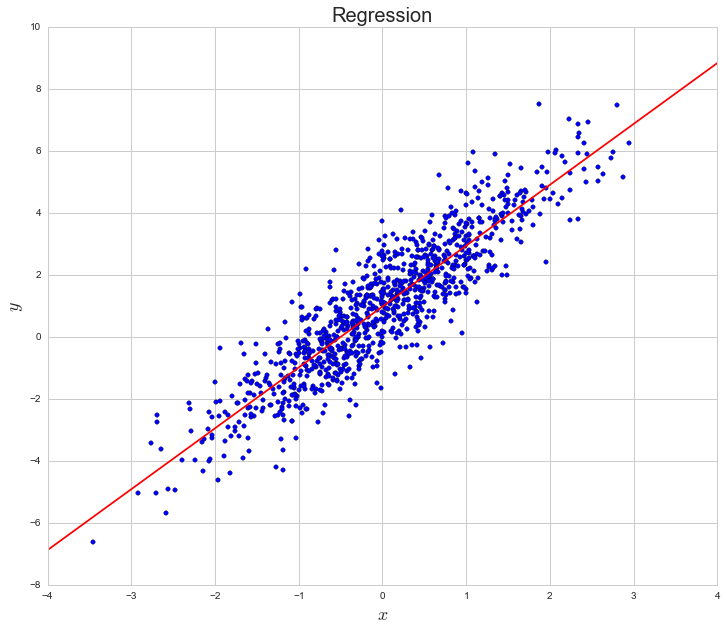

In [62]:
x = np.random.randn(1000)
e = np.random.randn(1000)
y = 1 + 2 * x + e
x = pd.DataFrame(x)
y = pd.DataFrame(y)
data = pd.merge(x, y, left_index=True, right_index=True)
mod = smf.ols(formula='y ~ x', data = data).fit()
print(mod.summary())
print 'beta1 = %0.4f'%(mod.params.x)

figure, ax = plt.subplots(figsize=(12,10))

mod = smf.ols(formula='y ~ x', data = data).fit()
abline_plot(model_results=mod, ax=ax, color='red')
ax.scatter(x, y)
ax.set_title('Regression', fontsize = 20)
ax.set_ylabel('$y$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)
ax.set_xlim([-4, 4])

# Comment   
With the generated series, the parameters in regression model are significant. But if the environment noise $\varepsilon$ is much more greater than the variance of x, the result may be different. 

# Question 5 & 6 & 7

beta1_mean = 1.9996, beta1_std = 0.0312


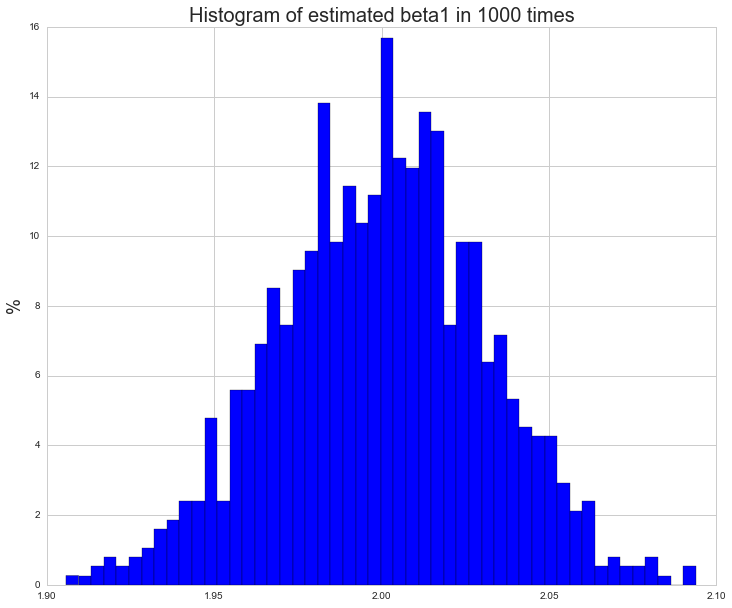

In [79]:
beta1 = []
for i in range(1000):
    x = np.random.randn(1000)
    e = np.random.randn(1000)
    y = 1 + 2 * x + e
    x = pd.DataFrame(x)
    y = pd.DataFrame(y)
    data = pd.merge(x, y, left_index=True, right_index=True)
    mod = smf.ols(formula='y ~ x', data = data).fit()
    beta1.append(mod.params.x)
   
print 'beta1_mean = %0.4f, beta1_std = %0.4f' % (np.mean(beta1), np.std(beta1))

plt.figure(figsize= (12,10))
plt.hist(beta1, bins=50, normed=True, color='blue')
plt.title('Histogram of estimated beta1 in 1000 times', fontsize=20)
plt.ylabel('%', fontsize=18)

e_beta1_mean = 7.3897, e_beta1_std = 0.2303


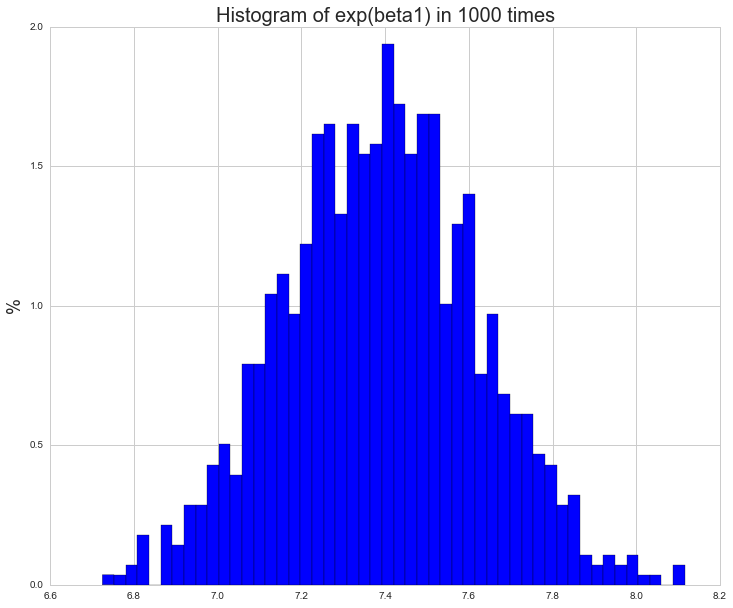

In [89]:
e_beta1 = exp(beta1)
print 'e_beta1_mean = %0.4f, e_beta1_std = %0.4f'% (np.mean(e_beta1), np.std(e_beta1))
plt.figure(figsize= (12,10))
plt.hist(e_beta1, bins=50, normed=True, color='blue')
plt.title('Histogram of exp(beta1) in 1000 times', fontsize=20)
plt.ylabel('%', fontsize=18)    